In [1]:
import numpy as np
from numerik import qr
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('5_gas_signal_fit_linear_data.txt')

x = data[:,0]
ym = data[:,1]

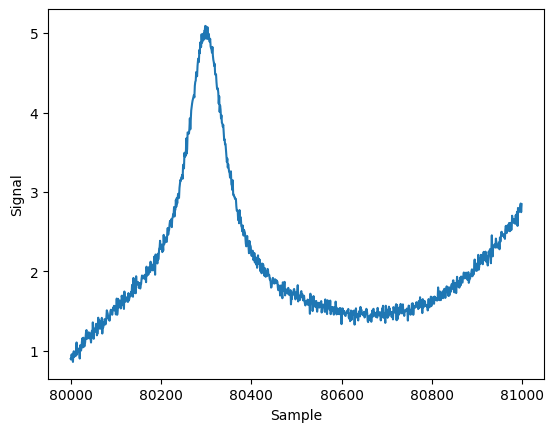

In [3]:
# visualize data
plt.plot(x, ym)
plt.ylabel("Signal")
plt.xlabel("Sample")
plt.show()

In [4]:
def lorentz_shape(x, a, s0, x0):
    x = (x - x0) / (s0/2)
    return a * 1/(1+x**2)

def poly3(x, a, b, c, d):
    return a + b*(x**1) + c*(x**2) + d*(x**3)


# fit function combination of poly3 and lorentz shape to data
s0 = 100
x0 = 80.3 * 10**3

A = np.vstack((np.ones_like(x), x**1, (x**2), (x**3), lorentz_shape(x, 1, s0, x0))).T
(a, b, c, d, e) = qr.linsolve_least_squares(A, ym)

print((a, b, c, d, e))

(-6444270.426903076, 240.261248548747, -0.0029858656966556744, 1.2368968375318909e-08, 3.3423238053004596)


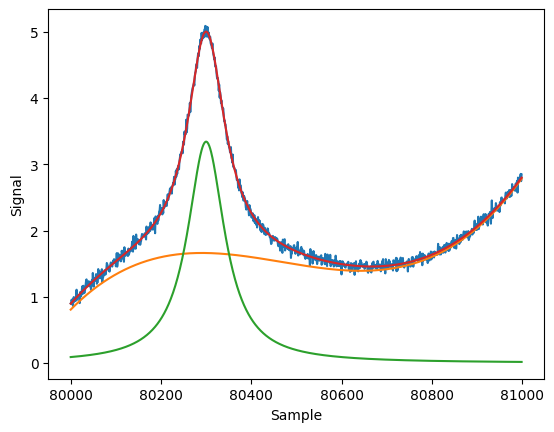

In [5]:
yfp = poly3(x, a, b, c, d)
yfl = lorentz_shape(x, e, s0, x0)

plt.plot(x, ym)

plt.plot(x, yfp)
plt.plot(x, yfl)
plt.plot(x, yfp+yfl)

plt.ylabel("Signal")
plt.xlabel("Sample")
plt.show()